<a href="https://colab.research.google.com/github/ViMasHub/Test_Kontur/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка библиотек

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

import librosa
import librosa.display
import IPython.display as ipd

# Загрузка и анализ аудио сигнала

In [ ]:
audio_file = '/1.opus'
signal, sr = librosa.load(audio_file)

In [ ]:
# посмотрим тип нашей переменный signal

print(type(signal), type(sr))
print(signal.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(176400,) 22050


In [ ]:
# плеер

ipd.Audio(audio_file)

# Визулизация сигнала


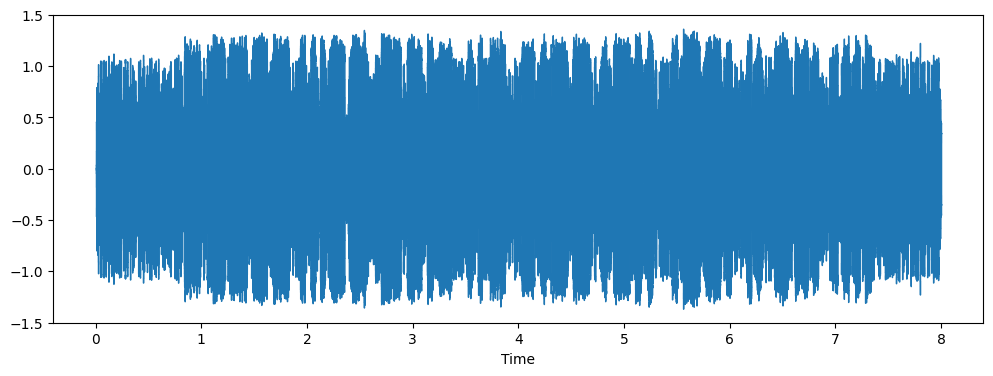

In [ ]:
# визулизация аудиосигнала

plt.figure(figsize=(12,4))
librosa.display.waveshow(signal, sr=sr)

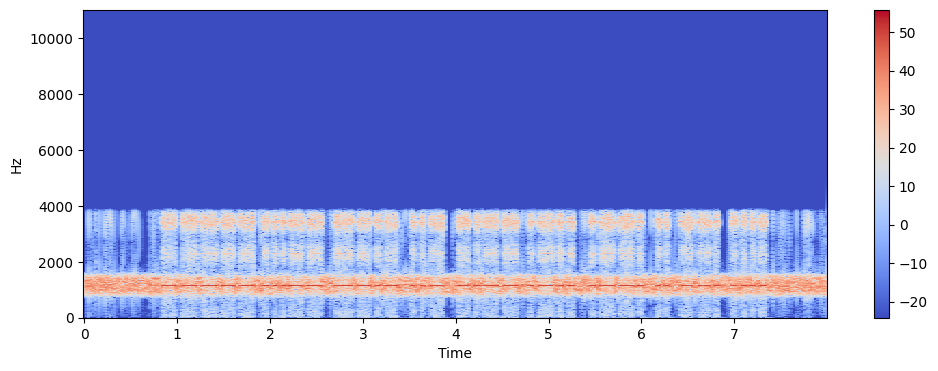

In [ ]:
# частота - цветности

plt.figure(figsize=(12,4))
x = librosa.stft(signal) # разбивка аудиосигнала на сигменты (2048)
xdb= librosa.amplitude_to_db(abs(x)) # переводим в ДЦб
librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

#df_xdb=pd.DataFrame(data=xdb)
#df_xdb

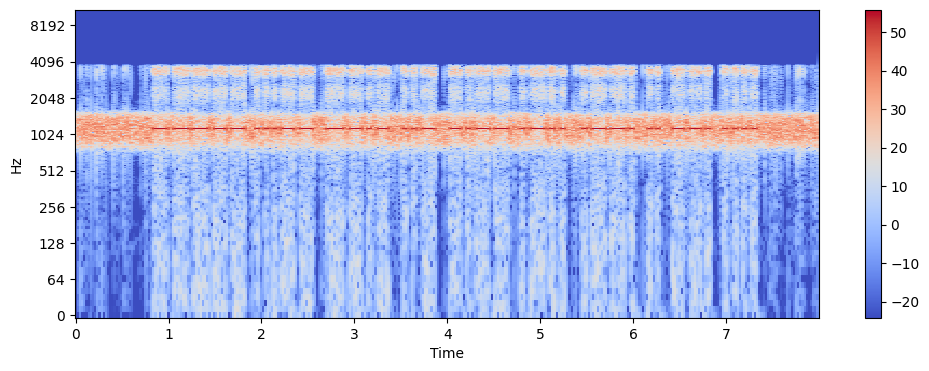

In [ ]:
# Log частота - цветности

plt.figure(figsize=(12,4))
librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

# Извлечение признаков из аудио сигнала



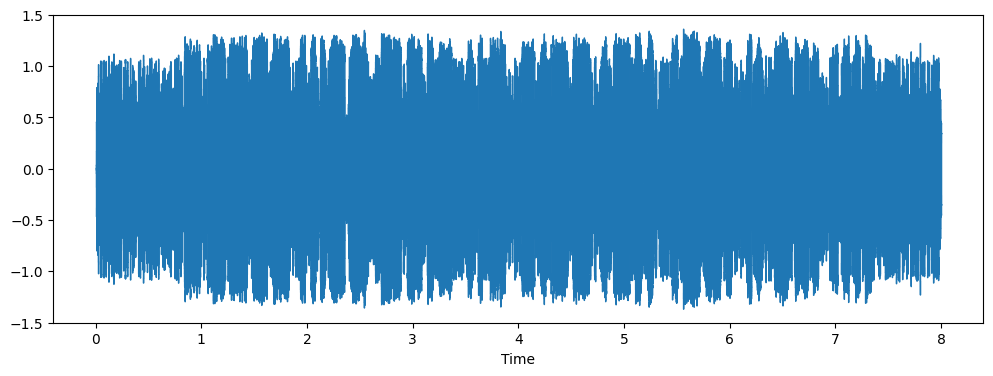

In [ ]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(signal, sr=sr)

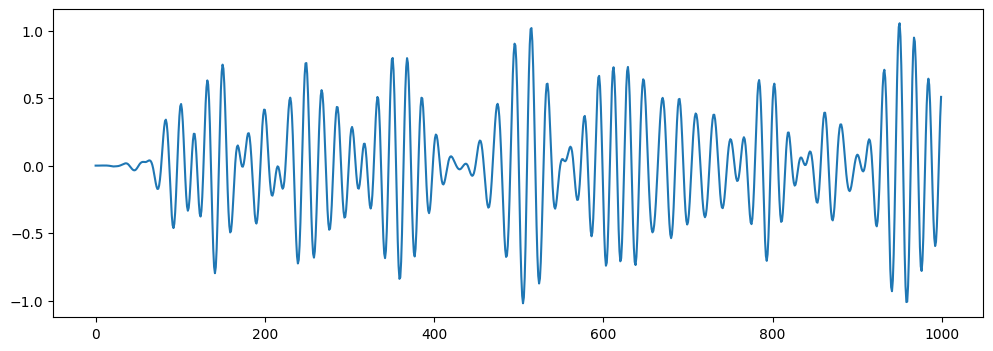

In [ ]:
# фрагмент аудиосигнала
n0 = 0
n1 = 1000
plt.figure(figsize=(12,4))
plt.plot(signal [n0 : n1])
plt.grid(which = 'minor',
         color = 'grey',
         linestyle = 'solid')
plt.show()

In [ ]:
# пересечение с нулем

zero_crossing = librosa.zero_crossings(signal[n0 : n1], pad=False)

print (type(zero_crossing))
print(zero_crossing.sum())
print()

<class 'numpy.ndarray'>
106



(345,)


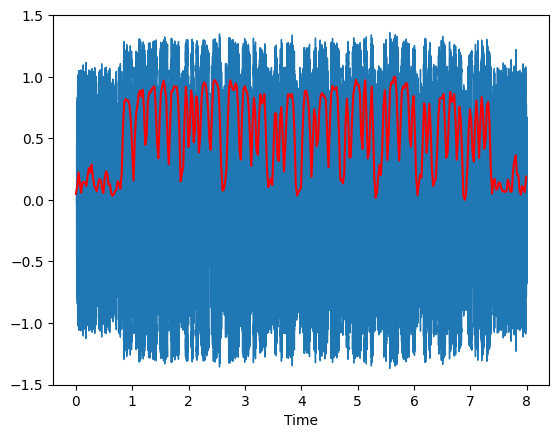

In [ ]:
# спектральный центроид

spectral_centroids = librosa.feature.spectral_centroid(y=signal, sr=sr)[0]
print(spectral_centroids.shape)

# вычисление времени для визулизации

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# нормализация центрального центроида

def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)

# построим график

librosa.display.waveshow(signal, sr=sr)
plt.plot(t, normalize(spectral_centroids), color='red')

<class 'numpy.ndarray'>


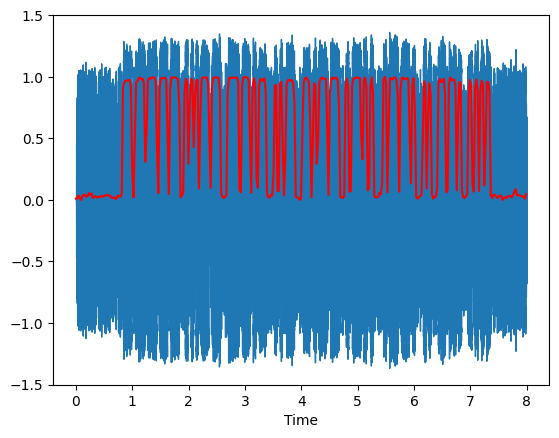

In [ ]:
# спектральный спад частоты

spectral_rolloff = librosa.feature.spectral_rolloff(y=signal, sr=sr)[0]
print(type(spectral_rolloff))

# вычисление времени для визулизации

frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames)

# нормализация центрального центроида

def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)

# построим график

librosa.display.waveshow(signal, sr=sr)
plt.plot(t, normalize(spectral_rolloff), color='red')

<class 'numpy.ndarray'>


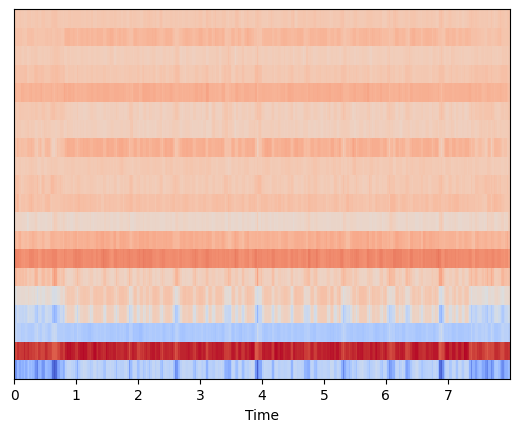

In [ ]:
# мел - частотные кепстральный коээфиценты

# делим сигнал на 512 точек

mfccs = librosa.feature.mfcc(y=signal, sr=sr)
print(type(mfccs))

librosa.display.specshow(mfccs, sr=sr, x_axis='time')


<class 'numpy.ndarray'>


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,335,336,337,338,339,340,341,342,343,344
0,-3.988033,-1.863091,-0.669647,-0.702997,-1.210098,-0.808979,-0.984841,-0.511159,-1.073721,-0.577530,...,0.069067,0.108064,-0.381326,-1.044503,-1.862084,-2.187654,-1.298342,-0.973169,-0.930439,-0.494750
1,-4.293821,-1.696998,-0.077042,-0.045716,-0.714197,-0.549765,-0.686579,0.391181,-0.460434,-0.199456,...,0.204821,0.167366,-0.259922,-1.434491,-1.886940,-1.913276,-0.733367,-0.180338,0.019660,-0.490242
2,4.523238,2.228150,1.351469,1.142891,1.348072,0.229530,0.526831,0.715691,1.150294,0.640802,...,-0.660311,-0.732037,-0.084273,0.260571,1.492124,2.070870,1.357792,1.346729,1.594335,0.868442
3,-2.519215,-1.531033,-0.816848,-0.975941,-1.242786,-1.194960,-1.286194,-1.041691,-1.318491,-0.856772,...,-0.485074,-0.395192,-0.745199,-1.026670,-1.679801,-2.033458,-1.454180,-1.162633,-1.068361,-0.694823
4,-2.287056,-1.669303,-1.047112,-1.095285,-1.036422,-0.960631,-0.993051,-0.866824,-1.152724,-1.172178,...,-0.672453,-0.526246,-0.919490,-1.342036,-1.584286,-1.853338,-1.250210,-0.880568,-0.901578,-0.787596
5,3.476808,1.959868,1.047853,1.017404,1.238879,1.074417,1.312498,0.683760,1.172797,0.158493,...,-0.245643,-0.159448,0.159192,0.243192,1.607373,2.045067,1.332594,1.168313,0.803454,1.068292
6,0.961633,1.288251,0.609926,0.745853,-0.128118,-1.381572,-1.631692,-2.137949,-1.333210,-1.262120,...,-0.979150,-0.447096,-0.159476,-0.380972,-1.193127,-1.350432,-1.883117,-1.081169,-0.516106,-3.201075
7,0.310631,-1.272887,-1.932913,-0.702643,0.200907,-1.905865,-2.414957,-1.862958,-1.670231,-2.407381,...,-1.557495,-0.916315,-0.451363,-0.541907,-1.546622,-1.588438,-2.214030,-0.677796,0.716341,-1.389624
8,2.725515,0.544158,0.101469,0.784382,0.766082,0.262433,-0.016460,-0.057207,-0.204857,-2.753780,...,-0.973695,-0.257292,0.296174,0.515645,1.734781,2.049072,-0.309395,0.547153,0.641396,3.228277
9,-2.863168,1.181334,3.377554,1.705260,-2.033148,-0.661775,-0.545424,-0.190401,-0.994579,-0.751125,...,1.790949,1.383729,0.906990,1.197167,0.020624,-0.726918,-1.217575,-1.464242,-1.729327,-1.674248


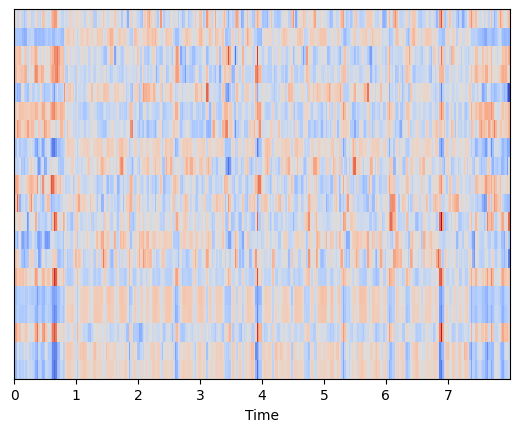

In [ ]:
# преобразуем рисунок

mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(type(mfccs))

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

# df_mfccs = pd.DataFrame(data=mfccs)
# df_mfccs


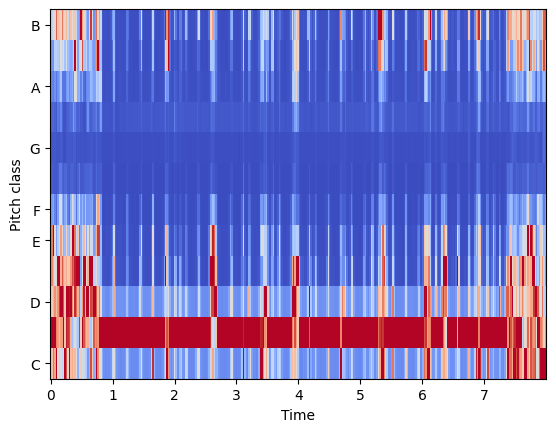

In [ ]:
# частота - цветность

hop_lenght = 512

chromagram = librosa.feature.chroma_stft(y=signal, sr=sr, hop_length = hop_lenght)

librosa.display.specshow(chromagram, sr=sr, x_axis='time', y_axis = 'chroma', hop_length = hop_lenght, cmap = 'coolwarm')

# Классификация аудио сигналов

In [13]:
# Загрузим библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import os
import librosa

In [14]:
# Загрузка данных и извлечение признаков

# Список для хранения признаков
out = []

# Загрузка нескольких аудиофайлов
uploaded_files = files.upload()



Saving 1.opus to 1.opus
Saving 2.opus to 2.opus
Saving 3.opus to 3.opus
Saving 4.opus to 4.opus
Saving 5.opus to 5.opus
Saving 6.opus to 6.opus
Saving 7.opus to 7.opus
Saving 8.opus to 8.opus
Saving 9.opus to 9.opus
Saving 10.opus to 10.opus
Saving 11.opus to 11.opus
Saving 12.opus to 12.opus
Saving 13.opus to 13.opus
Saving 14.opus to 14.opus
Saving 15.opus to 15.opus
Saving 16.opus to 16.opus
Saving 17.opus to 17.opus
Saving 18.opus to 18.opus
Saving 19.opus to 19.opus
Saving 20.opus to 20.opus
Saving 21.opus to 21.opus
Saving 22.opus to 22.opus
Saving 23.opus to 23.opus
Saving 24.opus to 24.opus
Saving 25.opus to 25.opus
Saving 26.opus to 26.opus
Saving 27.opus to 27.opus
Saving 28.opus to 28.opus


In [15]:
df_train=pd.read_csv('/train.csv')

df_train_work = df_train.head(28).copy()

df_train_work.head()


,id,message
0,1.opus,03ЩУЫЛПИГХ
1,2.opus,ЪЛТ0ДС6А3Г
2,3.opus,5ЭКЫБЗХЯН
3,4.opus,ЖЫЦОИ68КФ
4,5.opus,32Ю7МЫ ЗЛ


In [16]:
# Признаки
def extract_features(uploaded_files):
    audio, sr = librosa.load(uploaded_files, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr)
    return np.mean(mfccs.T, axis=0)

# Создание обучающего набора данных

data = []
labels = []

audio_files = np.array(df_train_work['id'])
transcriptions = np.array(df_train_work['message'])

for uploaded_files, transcriptions in zip(audio_files, transcriptions):
    features = extract_features(uploaded_files)
    data.append(features)
    labels.append(transcriptions)

# Создание DataFrame

#df = pd.DataFrame(data)
#df['label'] = labels

# Нормализация данных

from sklearn.preprocessing import MinMaxScaler

minmax_scaler=MinMaxScaler()
data_norm = minmax_scaler.fit_transform(data)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

x_train = data_norm
y_train = labels

# Обучение модели
model = RandomForestClassifier()
model.fit(x_train, y_train)



RandomForestClassifier()

In [10]:
df_test = pd.read_csv('/test.csv')

df_test_work = df_test.head(28).copy()

df_test_work.T

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
id,30001.opus,30002.opus,30003.opus,30004.opus,30005.opus,30006.opus,30007.opus,30008.opus,30009.opus,30010.opus,...,30019.opus,30020.opus,30021.opus,30022.opus,30023.opus,30024.opus,30025.opus,30026.opus,30027.opus,30028.opus


In [11]:
# Загрузка нескольких аудиофайлов
uploaded_files_2 = files.upload()

Saving 30001.opus to 30001.opus
Saving 30002.opus to 30002.opus
Saving 30003.opus to 30003.opus
Saving 30004.opus to 30004.opus
Saving 30005.opus to 30005.opus
Saving 30006.opus to 30006.opus
Saving 30007.opus to 30007.opus
Saving 30008.opus to 30008.opus
Saving 30009.opus to 30009.opus
Saving 30010.opus to 30010.opus
Saving 30011.opus to 30011.opus
Saving 30012.opus to 30012.opus
Saving 30013.opus to 30013.opus
Saving 30014.opus to 30014.opus
Saving 30015.opus to 30015.opus
Saving 30016.opus to 30016.opus
Saving 30017.opus to 30017.opus
Saving 30018.opus to 30018.opus
Saving 30019.opus to 30019.opus
Saving 30020.opus to 30020.opus
Saving 30021.opus to 30021.opus
Saving 30022.opus to 30022.opus
Saving 30023.opus to 30023.opus
Saving 30024.opus to 30024.opus
Saving 30025.opus to 30025.opus
Saving 30026.opus to 30026.opus
Saving 30027.opus to 30027.opus
Saving 30028.opus to 30028.opus


In [19]:
# Признаки
def extract_features_2(uploaded_files):
    audio_2, sr = librosa.load(uploaded_files_2, sr=None)
    mfccs_2 = librosa.feature.mfcc(y=audio_2, sr=sr)
    return np.mean(mfccs_2.T, axis=0)

data_2 = []
labels_2 = []

audio_files_2 = np.array(df_test_work['id'])


for uploaded_files_2 in audio_files_2:
    features_2 = extract_features_2(uploaded_files_2)
    data_2.append(features_2)

# Нормализация данных

from sklearn.preprocessing import MinMaxScaler

minmax_scaler=MinMaxScaler()
data_norm_2 = minmax_scaler.fit_transform(data_2)

# Предсказание

x_test = data_norm_2

y_pred = model.predict(x_test)

df_test_work['label'] = y_pred

df_test_work.head(5)



,id,label
0,30001.opus,ЖЫЦОИ68КФ
1,30002.opus,КФЬ2М5Д
2,30003.opus,КФЬ2М5Д
3,30004.opus,ЙЪ3ТОДВГМ
4,30005.opus,32Ю7МЫ ЗЛ


In [22]:
# Выгрузка данных

df_test_work.to_csv('/submission.csv')

